In [2]:
from fastai.vision import *

### Apple images setup 

In [14]:
folder = 'apples'
file = 'urls_apples.csv'
path = Path('data/fruit')
dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [16]:
download_images(path/folder/file, dest, max_pics=200)

### Banana images setup 

In [20]:
folder = 'bananas'
file = 'urls_bananas.csv'
path = Path('data/fruit')
dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

[PosixPath('data/fruit/bananas'), PosixPath('data/fruit/apples')]

In [21]:
download_images(path/folder/file, dest, max_pics=200)

### Oranges images setup 

In [22]:
folder = 'oranges'
file = 'urls_oranges.csv'
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [23]:
download_images(path/folder/file, dest, max_pics=200)

### Tomato images setup 

In [92]:
folder = 'tomatos'
file = 'urls_tomatos.csv'
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [94]:
download_images(path/folder/file, dest, max_pics=200)

### Broccoli images setup (for Brassicas)

In [100]:
folder = 'broccoli'
file = 'urls_broccoli.csv'
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [101]:
download_images(path/folder/file, dest, max_pics=200)

### Onion image setup

In [102]:
folder = 'onions'
file = 'urls_onions.csv'
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [103]:
download_images(path/folder/file, dest, max_pics=200)

### Leeks image setup

In [104]:
folder = 'leeks'
file = 'urls_leeks.csv'
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [105]:
download_images(path/folder/file, dest, max_pics=200)

### Potato image setup

In [106]:
folder = 'potatos'
file = 'urls_potatos.csv'
path = Path('data/fruit')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [107]:
download_images(path/folder/file, dest, max_pics=200)

In [118]:
classes = ['apples','bananas','oranges', 'tomatos', 'broccoli', 'onions', 'leeks', 'potatos']

In [119]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

# Run from here if not creating new folders

In [16]:
np.random.seed(42)
path = Path('data/fruit')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
df = pd.read_csv(path/'cleaned.csv', header='infer')
df

name    label
0      bananas/00000049.jpg  bananas
1      bananas/00000076.jpg  bananas
2      bananas/00000170.png  bananas
3     bananas/00000069.jpeg  bananas
4      bananas/00000114.jpg  bananas
...                     ...      ...
1310   potatos/00000124.jpg  potatos
1311   potatos/00000079.jpg  potatos
1312   potatos/00000084.jpg  potatos
1313   potatos/00000164.jpg  potatos
1314   potatos/00000191.jpg  potatos

[1315 rows x 2 columns]

In [5]:
np.random.seed(42)
path = Path('data/fruit')
data = ImageDataBunch.from_df(path, df=df, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
print(data.classes)

['apples', 'bananas', 'broccoli', 'leeks', 'onions', 'oranges', 'potatos', 'tomatos']


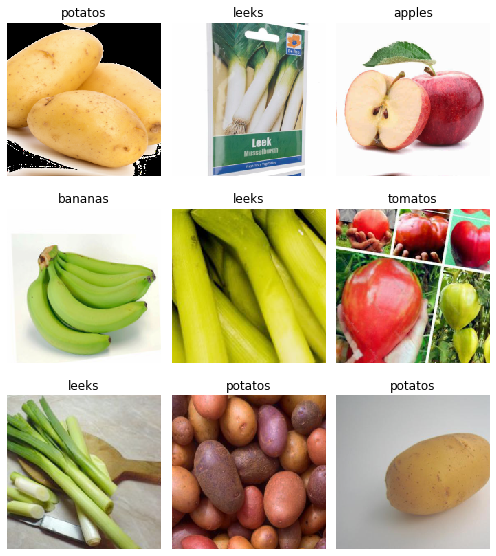

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apples',
  'bananas',
  'broccoli',
  'leeks',
  'onions',
  'oranges',
  'potatos',
  'tomatos'],
 8,
 1052,
 263)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

In [11]:
learn.save('stage-1')
#learn.load('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


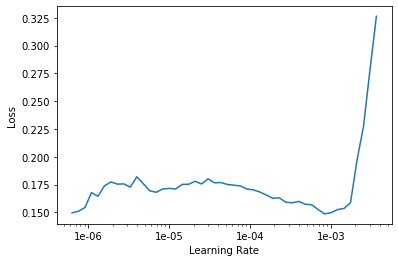

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

In [151]:
learn.save('stage-2')
#learn.load('stage-2')

In [139]:
interp = ClassificationInterpretation.from_learner(learn)

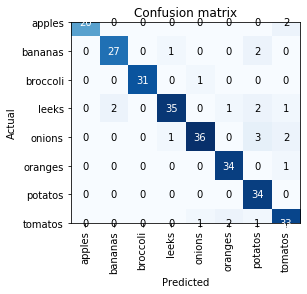

In [148]:
interp.plot_confusion_matrix()

In [19]:
from fastai.widgets import *

In [22]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [23]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [24]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [25]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [26]:
path = Path('data/fruit')
np.random.seed(42)
df = pd.read_csv(path/'cleaned.csv', header='infer')
data = ImageDataBunch.from_df(path, df=df, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [50]:
learn_cln = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jakec338/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 17780572.60it/s]


In [51]:
learn_cln.fit_one_cycle(5, max_lr=1e-3)

In [52]:
learn_cln.unfreeze()

In [53]:
learn_cln.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


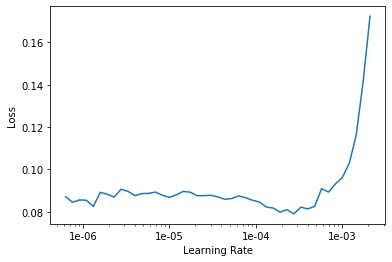

In [54]:
learn_cln.recorder.plot()

In [55]:
learn_cln.fit_one_cycle(3, max_lr=slice(1e-5,1e-3))

In [157]:
#learn_cln.load('stage-2');

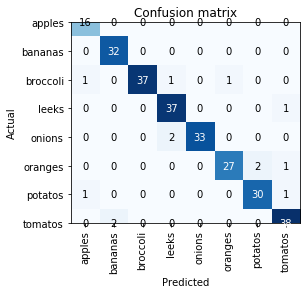

In [58]:
interp = ClassificationInterpretation.from_learner(learn_cln)
interp.plot_confusion_matrix()

In [59]:
learn_cln.export('export_v3.pkl')

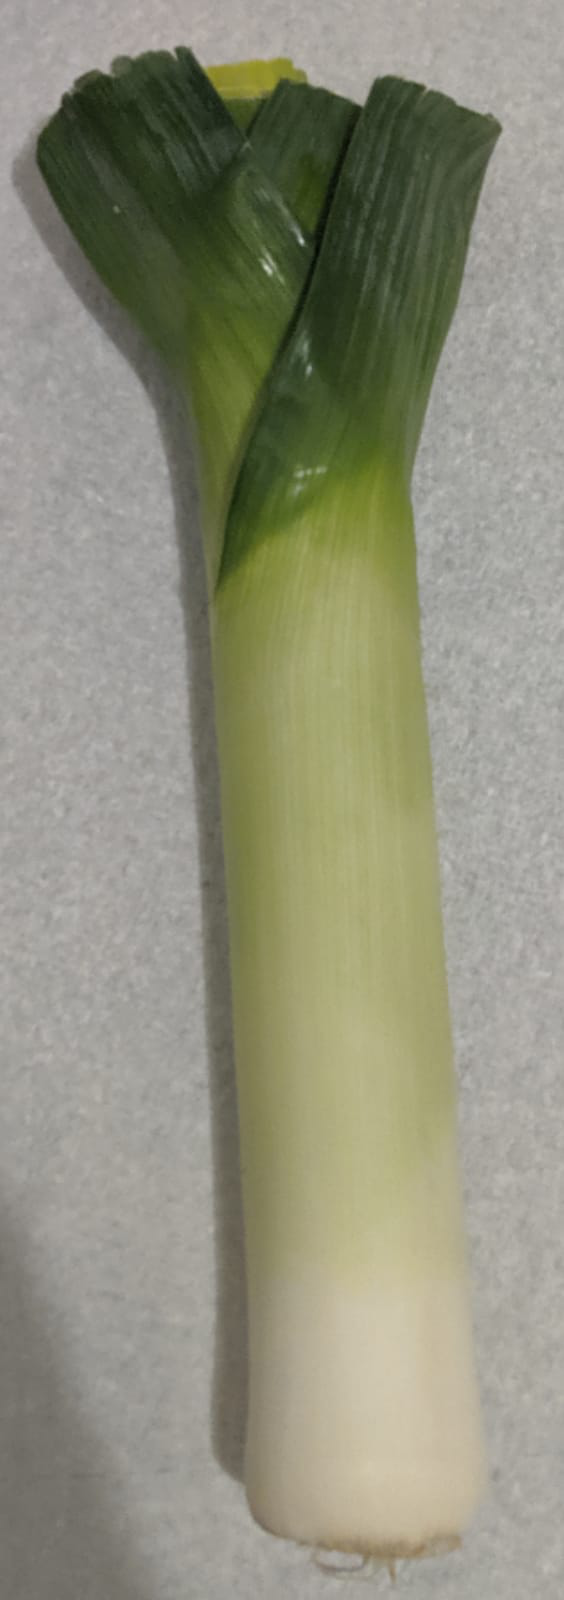

In [68]:
path = Path('data')
img = open_image(path/'test_pics'/'leek_test_1.jpg')
img

In [69]:
path = Path('data/fruit')
learn = load_learner(path, 'export_v3.pkl')

In [70]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category leeks

In [71]:
outputs

tensor([6.7854e-04, 7.7420e-05, 2.3944e-04, 9.9054e-01, 7.9299e-03, 1.1491e-04,
        5.5202e-06, 4.1660e-04])